# Problem	Statement:	Find	out	the	supply	demand	gap.


Steps taken are:
1. Data cleaning and Manipulation
2. Analysing trends for each day
3. Combining data for all days
4. Binning time into 5 categories
5. Problem identification
   * Cancelled trip
   * No Cars available

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import csv file

In [2]:
df=pd.read_csv('../input/uber-data/Uber Request Data1.csv')

In [3]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


# check dimensions

In [4]:
df.shape

(6745, 6)

In [5]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

# drop duplicate values on the basis of Request id

In [6]:
df.drop_duplicates('Request id')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54,NaN


# check null values 

In [7]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [8]:
print(100*(df.isnull().sum())/6745)

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64


In [9]:
df.describe

<bound method NDFrame.describe of       Request id Pickup point  Driver id             Status Request timestamp  \
0            619      Airport        1.0     Trip Completed  11-07-2016 11:51   
1            867      Airport        1.0     Trip Completed  11-07-2016 17:57   
2           1807         City        1.0     Trip Completed  12-07-2016 09:17   
3           2532      Airport        1.0     Trip Completed  12-07-2016 21:08   
4           3112         City        1.0     Trip Completed  13-07-2016 08:33   
...          ...          ...        ...                ...               ...   
6740        6745         City        NaN  No Cars Available  15-07-2016 23:49   
6741        6752      Airport        NaN  No Cars Available  15-07-2016 23:50   
6742        6751         City        NaN  No Cars Available  15-07-2016 23:52   
6743        6754         City        NaN  No Cars Available  15-07-2016 23:54   
6744        6753      Airport        NaN  No Cars Available  15-07-2016 23:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


# as we can see Request timestamp and Drop timestamp are non-null objects, now change them into datetime object

In [11]:
df['Request timestamp']=df['Request timestamp'].astype(str)
df['Request timestamp']=df['Request timestamp'].str.replace('/','-')
df['Request timestamp']=pd.to_datetime(df['Request timestamp'],dayfirst=True)

In [12]:
df['Drop timestamp']=df['Drop timestamp'].astype(str)
df['Drop timestamp']=df['Drop timestamp'].str.replace('/','-')
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'],dayfirst=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [14]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:00,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:00,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:00,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:00,NaT


# extracting day and hour from Request timestamp

In [15]:
day=df['Request timestamp'].dt.day
day.head()
print(day.value_counts())
df['day']=day

15    1381
11    1367
14    1353
13    1337
12    1307
Name: Request timestamp, dtype: int64


In [16]:
hour=df['Request timestamp'].dt.hour
hour.head()
print(hour.value_counts())
df['hour']=hour

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: Request timestamp, dtype: int64


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


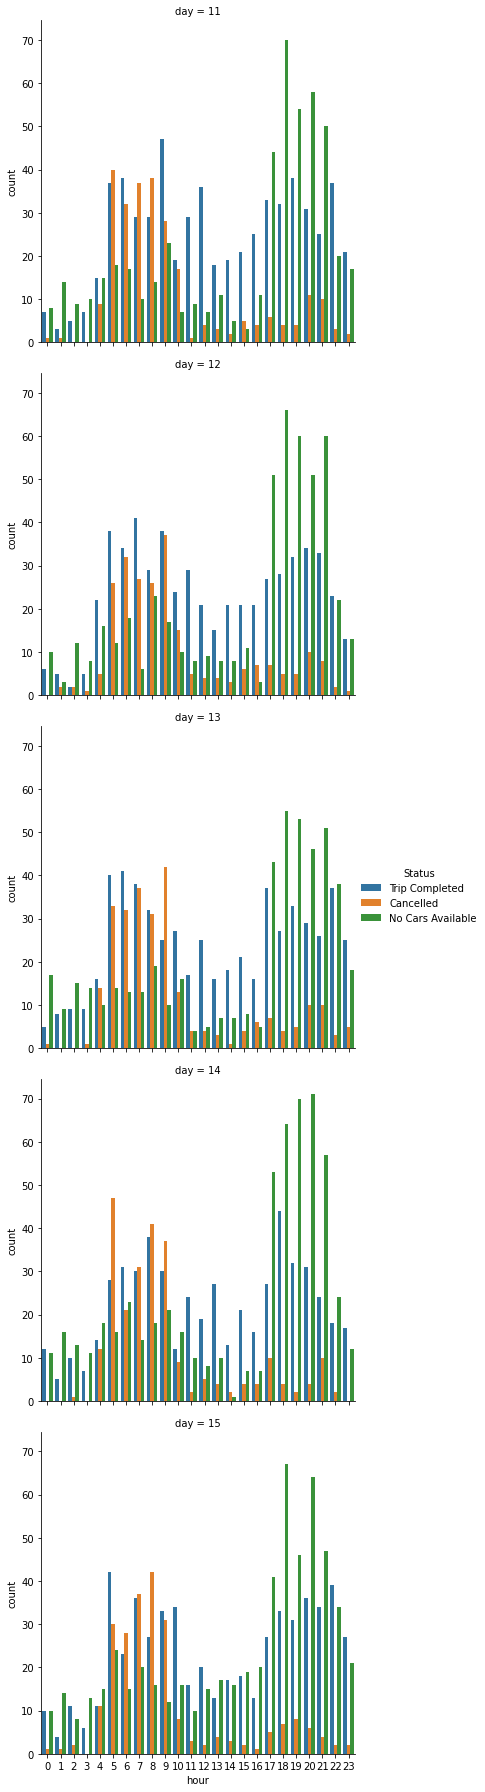

In [17]:
sns.factorplot(x ='hour',hue='Status',row='day', data = df,kind='count')
plt.show()

In [18]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'day', 'hour'],
      dtype='object')

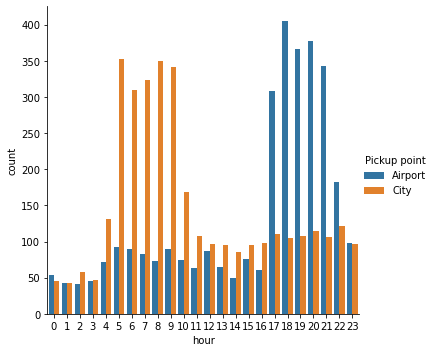

In [19]:
sns.factorplot(x='hour', hue='Pickup point',data=df, kind='count')

# for better vision divide the timespan into 4 different time slots

In [20]:
def timespan(hr):
    if hr<5:
        return 'Pre Morning'
    elif 5<hr<10:
        return 'Morning'
    elif 10<hr<17:
        return 'After 10am'
    elif 17<hr<22:
        return 'Eve'
    else:
        return 'Night'
df['timeslot']=df.hour.apply(lambda hr: timespan(hr))

In [21]:
df['timeslot'].value_counts()

Eve            1924
Morning        1658
Night          1604
After 10am      981
Pre Morning     578
Name: timeslot, dtype: int64

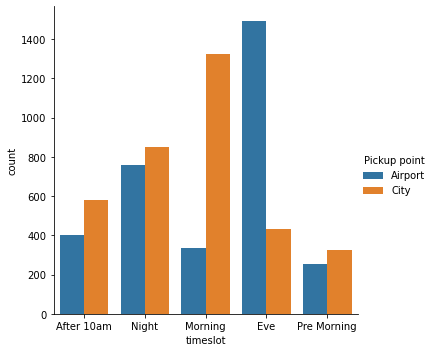

In [22]:
sns.factorplot(x='timeslot', hue='Pickup point' , data=df , kind='count')

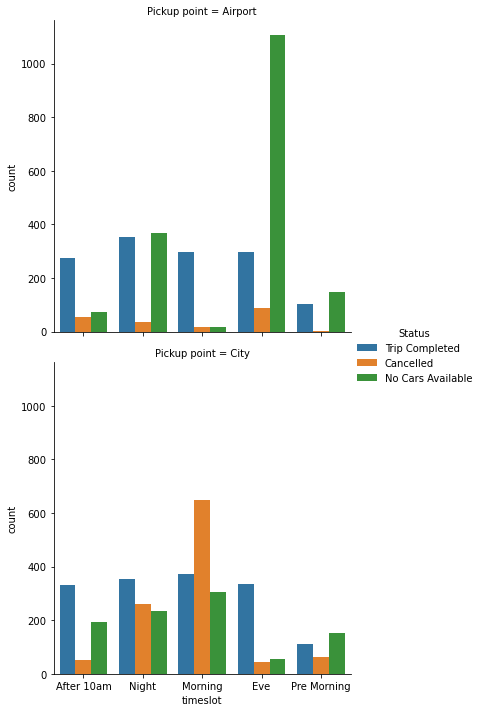

In [23]:
sns.factorplot(x='timeslot', hue='Status',row ='Pickup point', data= df , kind='count')

****max cancellations are in morning from city to airport 
****max no cars available in eve from airport to city****

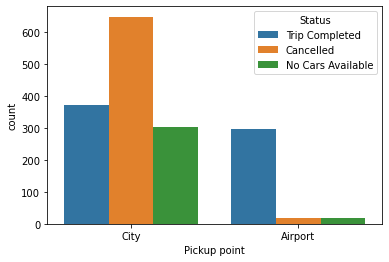

In [24]:
df_mor=df[df.timeslot=='Morning']
sns.countplot(x='Pickup point',hue='Status',data=df_mor)

****as you can see the max cars cancelled are from city****

In [25]:
df_city_cars_cancelled=df_mor.loc[(df_mor['Pickup point']=='City') & (df_mor['Status']=='Cancelled')]
print(len(df_city_cars_cancelled))

648


In [26]:
#lets see demand and supply in city in the morning slot
df_city_comp=df_mor.loc[(df_mor['Pickup point']=='City') & (df_mor['Status']=='Trip Completed')]
print(len(df_city_comp))

372


In [27]:
df_city_demand=df_mor.loc[df_mor['Pickup point']=='City']
print(len(df_city_demand))

1324


In [28]:
df_airport_cars_cancelled=df_mor.loc[(df_mor['Pickup point']=='Airport') & (df_mor['Status']=='Cancelled')]
print(len(df_airport_cars_cancelled))

19


In [29]:
#lets see demand and supply in airport in the morning slot
df_airport_comp=df_mor.loc[(df_mor['Pickup point']=='Airport')  & (df_mor['Status']=='Trip Completed')]
print(len(df_airport_comp))

297


In [30]:
df_airport_demand=df_mor.loc[df_mor['Pickup point']=='Airport']
print(len(df_airport_demand))

334


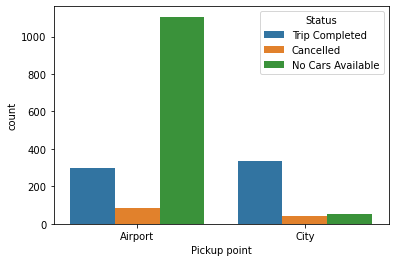

In [31]:
df_eve=df[df.timeslot=='Eve']
sns.countplot(x='Pickup point', hue='Status', data= df_eve)

In [32]:
df_city_cars_notavailable=df_eve.loc[(df_eve['Pickup point']=='City') & (df_eve['Status']=='No Cars Available')]
print(len(df_city_cars_notavailable))

54


In [33]:
#lets see demand and supply in city in the evening slot
df_city_completed=df_eve.loc[(df_eve['Pickup point']=='City') & (df_eve['Status']=='Trip Completed')]
print(len(df_city_completed))

334


In [34]:
df_city_cars_demand=df_eve.loc[df_eve['Pickup point']=='City']
print(len(df_city_cars_demand))

432


In [35]:
df_airport_cars_notavailable=df_eve.loc[(df_eve['Pickup point']=='Airport') & (df_eve['Status']=='No Cars Available')]
print(len(df_airport_cars_notavailable))

1106


In [36]:
#lets see demand and supply in airport in the evening slot 
df_airport_completed=df_eve.loc[(df_eve['Pickup point']=='Airport') & (df_eve['Status']=='Trip Completed')]
print(len(df_airport_completed))

299


In [37]:
df_airport_cars_demand=df_eve.loc[df_eve['Pickup point']=='Airport']
print(len(df_airport_cars_demand))

1492


# now lets have a look more clearly using pie chart

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x7fc470e6b090>,
 [Text(0.03653444542939247, 1.0993931209067878, 'Cancelled'),
  Text(-0.7534583310544382, -0.8014365498058226, 'Trip Completed'),
  Text(0.8260191017991098, -0.726424423779234, 'No Cars Available')],
 [Text(0.019927879325123164, 0.599668975040066, '48.9%'),
  Text(-0.41097727148423896, -0.4371472089849941, '28.1%'),
  Text(0.4505558737086053, -0.3962315038795821, '23.0%')])

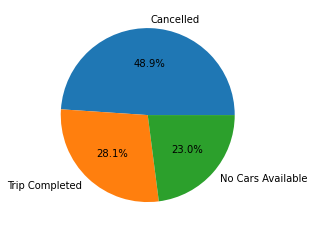

In [38]:
df_city=df.loc[(df['Pickup point']=='City') & (df['timeslot']=='Morning')]
df_city_plot=pd.DataFrame(df_city.Status.value_counts())
labels=df_city_plot.index.values
plt.pie(df_city_plot,labels=labels,autopct='%1.1f%%')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


([<matplotlib.patches.Wedge at 0x7fc470d219d0>,
 [Text(-0.7562374625099835, 0.7988146845773815, 'No Cars Available'),
  Text(0.5980666002858239, -0.9232098036863325, 'Trip Completed'),
  Text(1.0815944740926404, -0.2003831170839126, 'Cancelled')],
 [Text(-0.4124931613690818, 0.43571710067857167, '74.1%'),
  Text(0.3262181456104494, -0.5035689838289086, '20.0%'),
  Text(0.5899606222323492, -0.1092998820457705, '5.8%')])

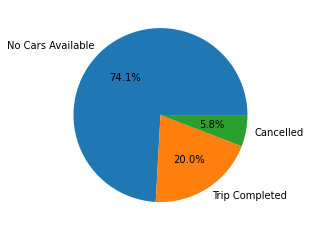

In [39]:
df_airport=df.loc[(df['Pickup point']=='Airport') & (df['timeslot']=='Eve')]
df_airport_plot=pd.DataFrame(df_airport.Status.value_counts())
labels=df_airport_plot.index.values
plt.pie(df_airport_plot,labels=labels,autopct='%1.1f%%')
